This Notebook is designed to classify network packets as `Normal` or `Non-normal` packet. <br>
And in this notebook I am going to cover these topics:
1. Data preprocessing
2. Feature Engineering
3. Model Selection
4. Model Training
5. Model Evaluation
6. Save the model

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# Multipale File
Combine them all together and make a single CSV File.

In [ ]:
#install unrar to envirnoment for unrar
#!sudo apt-get install unrar

In [ ]:
# Unrar the main dataset
# !unrar x "/content/drive/MyDrive/Final-Project/data/Attack-data.rar" "/content/drive/MyDrive/Final-Project/data/"

In [ ]:
# Unrar the suset-attack dataset
# !unrar x "/content/drive/MyDrive/Final-Project/data/subset_attacks.rar" "/content/drive/MyDrive/Final-Project/data/"

In [ ]:
# # Importing files as they are sepreted
# friday_afternoon = pd.read_csv("/content/drive/MyDrive/Final-Project/data/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
# friday_afternoon

In [ ]:
# friday_portscan = pd.read_csv("/content/drive/MyDrive/Final-Project/data/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
# friday_portscan

In [ ]:
# friday_morning = pd.read_csv("/content/drive/MyDrive/Final-Project/data/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv")
# friday_morning

In [ ]:
# monday = pd.read_csv("/content/drive/MyDrive/Final-Project/data/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv")

In [ ]:
# thursday_afternoon = pd.read_csv("/content/drive/MyDrive/Final-Project/data/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")

In [ ]:
# thursday_morning = pd.read_csv("/content/drive/MyDrive/Final-Project/data/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")

In [ ]:
# tuesday = pd.read_csv("/content/drive/MyDrive/Final-Project/data/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv")

In [ ]:
# wednesday = pd.read_csv("/content/drive/MyDrive/Final-Project/data/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv")

In [ ]:
# Combine datasets
# merged_data = pd.concat([friday_morning, friday_afternoon, friday_portscan, tuesday, thursday_afternoon,
#                          thursday_morning, wednesday, monday], ignore_index=True) # remove the index
# merged_data.to_csv("/content/drive/MyDrive/Final-Project/data/attack-data.csv", index=False)

In [ ]:
# importing dataset
# data = pd.read_csv("drive/MyDrive/Final-Project/data/attack-data.csv")
# data.head(5)

In [ ]:
# Step one: Preprocessing
# data.info() # information of dataset such as features data-type

### Duplicate Feature checking
Check every feature of dataset that are not duplicated and if there is then check for no duplicate values.
`Duplicate data` can have detrimental effects on your machine learning models and outcomes, such as reducing data diversity and representativeness, which can `lead to overfitting or biased models.`

In [ ]:
# def duplicate_feature(data):
#   '''
#   This function is going to check if Fwd Header Lenght feature values are the same as Fwd Header Lenght.1.
#   And then remove if the same
#   '''

#   flag = 0

#   # check for unsimilarity values in both feature
#   dup = data[data[' Fwd Header Length'] != data[' Fwd Header Length.1']]
#   if len(dup) > 0: # if lenght of dup is greater then zero means that there are values which are not similar
#     flag = 1

#   if flag == 0: # remove duplicate feature
#     data.drop(' Fwd Header Length.1', axis=1, inplace=True)

#   return

In [ ]:
# duplicate_feature(data)

In [ ]:
# data.columns

In [ ]:
# len(data.columns)

### Combine main with subset dataset
My main dataset has a few attack types data and this cause bias in my model.
To solve this problem I have two main option:
1. Balance the main dataset in two method:
  A. Undersampling.
  B. Oversampling.
These two method has its own Pros and cons.
2. Collect More Data.
And I prefered the second method.
For more info check the link bellow:
https://medium.com/cord-tech/introduction-to-balanced-and-imbalanced-datasets-in-machine-learning-be60c6eeb8be#:~:text=Balancing%20a%20dataset%20makes%20training,because%20it%20contains%20more%20data.

### Why Shuffle the Dataset?
**Avoid Sequence Bias:**
If the augmented data is simply appended to the end of the main dataset, the model might learn to associate the sequence of the data with specific labels, leading to poor generalization.

**Ensure Uniform Distribution:**
Shuffling ensures that the data is uniformly distributed, helping the model learn the true underlying patterns rather than the order in which the data is presented.

In [ ]:
# subset dataset
# sub_data = pd.read_csv("/content/drive/MyDrive/Final-Project/data/subset_attacks.csv")
# sub_data

In [ ]:
# from sklearn.utils import shuffle

# def combine_datasets():

#   # Map attack types
#   attack_mapping = {
#       'xss': 'Web Attack � XSS',
#       'password': 'Web Attack � Brute Force',
#       'injection': 'Web Attack � Sql Injection',
#       'scanning': 'PortScan'
#   }

#   # Map values in Label column
#   sub_data['Attack'] = sub_data['Attack'].map(attack_mapping)

#   # Ensure the feature names in cut_df match those in main_df
#   sub_data.columns = data.columns

#   # Verify that the columns match
#   assert list(sub_data.columns) == list(data.columns), "Column names do not match!"

#   # Append the cut dataset to the main dataset
#   combined_df = pd.concat([data, sub_data], ignore_index=True)

#   # Shuffle the combined dataset
#   shuffled_df = shuffle(combined_df, random_state=42)

#   # Save the shuffled dataset to a new CSV file
#   shuffled_df.to_csv('/content/drive/MyDrive/Final-Project/data/augmented_shuffled_dataset.csv', index=False)

#   return

In [ ]:
# combine_datasets()

In [ ]:
# importing important library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Final-Project/data/augmented_shuffled_dataset.csv")
data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,5211792,8,6,367.0,3710.0,210.0,0.0,45.875000,79.373327,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,443,5415975,9,4,376.0,5422.0,189.0,0.0,41.777778,68.034509,...,20,295682.0,0.0,295682.0,295682.0,5120290.0,0.0,5120290.0,5120290.0,BENIGN
2,53,178954,4,2,192.0,180.0,48.0,48.0,48.000000,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,135,63,1,1,0.0,6.0,0.0,0.0,0.000000,0.000000,...,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PortScan
4,54273,17,1,1,0.0,0.0,0.0,0.0,0.000000,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3491449,80,98304890,5,8,372.0,11595.0,360.0,0.0,74.400000,159.683437,...,20,10972.0,0.0,10972.0,10972.0,98300000.0,0.0,98300000.0,98300000.0,DoS Hulk
3491450,443,3976073,5,1,129.0,41.0,45.0,6.0,25.800000,18.780309,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3491451,53,25282,2,2,80.0,174.0,40.0,40.0,40.000000,0.000000,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3491452,53,24569,2,2,60.0,344.0,30.0,30.0,30.000000,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [ ]:
# preprocess step:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3491454 entries, 0 to 3491453
Data columns (total 78 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   float64
 5    Total Length of Bwd Packets  float64
 6    Fwd Packet Length Max        float64
 7    Fwd Packet Length Min        float64
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         float64
 11   Bwd Packet Length Min        float64
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [ ]:
# Feature name checkup
data.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [ ]:
# Check value counts of Label feature
data[' Label'].value_counts()

,count
Label,
BENIGN,2273097
Web Attack � XSS,415862
DoS Hulk,231073
PortScan,173908
DDoS,128027
Web Attack � Brute Force,125052
Web Attack � Sql Injection,106999
DoS GoldenEye,10293
FTP-Patator,7938


In [ ]:
# percentage of every types of attack and normal data
data[' Label'].value_counts() / len(data)

,count
Label,
BENIGN,0.651046
Web Attack � XSS,0.119109
DoS Hulk,0.066182
PortScan,0.049810
DDoS,0.036669
Web Attack � Brute Force,0.035817
Web Attack � Sql Injection,0.030646
DoS GoldenEye,0.002948
FTP-Patator,0.002274


In [ ]:
# checking for null values
np.array(data.isna().sum())

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0, 1358,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0])

In [ ]:
# checking which feature has missing values
data.columns[np.where(data.isna().sum())]

Index(['Flow Bytes/s'], dtype='object')

In [ ]:
# checking whether the null values are randomly distributed or not
data[data['Flow Bytes/s'].isna()]

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1738,80,0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS Hulk
3575,80,0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS Hulk
4735,80,0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS Hulk
5214,80,0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS Hulk
5748,80,0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS Hulk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476755,80,0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS Hulk
3479104,80,0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS Hulk
3483402,80,0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS Hulk
3490653,80,0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS Hulk


The steps above declare that we can remove null Values.
Steps are:
1. Null values are less
2. Feature which has null value is important
3. It is distributed.
4. Read more in this article https://www.quora.com/How-do-you-decide-if-you-should-drop-or-impute-missing-values-in-a-dataset

In [ ]:
# dropping null values
data.dropna(inplace=True)

In [ ]:
# check again for null value
np.array(data.isna().sum())

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Checking for infinit value
np.isinf(np.array(data.drop(' Label', axis=1).sum()))

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [ ]:
# Check as Zero and one
np.array(np.isinf(data.drop(' Label', axis=1)).sum())

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0, 1509, 1509,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0])

In [ ]:
# Check the indexes
index = np.where(np.array(np.isinf(data.drop(' Label', axis=1)).sum()))
index

(array([14, 15]),)

In [ ]:
# Check Columns name
data.columns[index]

Index(['Flow Bytes/s', ' Flow Packets/s'], dtype='object')

In [ ]:
# Check rows as they have infinity
# Flow Bytes/s feature
data[data['Flow Bytes/s'] == float('inf')]

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
2473,18101,0,1,1,2.0,6.0,2.0,2.0,2.0,0.00000,...,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PortScan
6995,51880,0,2,0,37.0,0.0,31.0,6.0,18.5,17.67767,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
7641,1840,0,1,1,0.0,6.0,0.0,0.0,0.0,0.00000,...,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PortScan
7738,22,0,1,1,6.0,6.0,6.0,6.0,6.0,0.00000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
13077,50140,0,2,0,12.0,0.0,6.0,6.0,6.0,0.00000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3479741,48354,0,1,1,6.0,2.0,6.0,6.0,6.0,0.00000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3482871,49543,0,1,1,6.0,6.0,6.0,6.0,6.0,0.00000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3484072,35760,0,2,0,31.0,0.0,31.0,0.0,15.5,21.92031,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3486263,443,0,1,1,6.0,6.0,6.0,6.0,6.0,0.00000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [ ]:
# Flow Packets/s feature infinity
data[data[' Flow Packets/s'] == float('inf')]

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
2473,18101,0,1,1,2.0,6.0,2.0,2.0,2.0,0.00000,...,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PortScan
6995,51880,0,2,0,37.0,0.0,31.0,6.0,18.5,17.67767,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
7641,1840,0,1,1,0.0,6.0,0.0,0.0,0.0,0.00000,...,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PortScan
7738,22,0,1,1,6.0,6.0,6.0,6.0,6.0,0.00000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
13077,50140,0,2,0,12.0,0.0,6.0,6.0,6.0,0.00000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3479741,48354,0,1,1,6.0,2.0,6.0,6.0,6.0,0.00000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3482871,49543,0,1,1,6.0,6.0,6.0,6.0,6.0,0.00000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3484072,35760,0,2,0,31.0,0.0,31.0,0.0,15.5,21.92031,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3486263,443,0,1,1,6.0,6.0,6.0,6.0,6.0,0.00000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [ ]:
# Is Flow Packets/s feature rows are the same as Flow Bytes/s feature?
data[data[' Flow Packets/s'] == float('inf')] == data[data['Flow Bytes/s'] == float('inf')]

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
2473,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
6995,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
7641,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
7738,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
13077,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3479741,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3482871,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3484072,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3486263,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [ ]:
# Checking as Numpy array
np.array(data[data[' Flow Packets/s'] == float('inf')] == data[data['Flow Bytes/s'] == float('inf')]).all()

np.True_

All infinity values are in the same rows of two different features(Flow Packets/s, Flow Bytes/s)

In [ ]:
# Checking the Label feature as all infinity values are normal packets or no
data[data[' Flow Packets/s'] == float('inf')][' Label'].value_counts()

,count
Label,
BENIGN,1368
PortScan,126
Bot,10
FTP-Patator,3
DDoS,2


In [ ]:
# Lets check all different values we have in Label feature
data[' Label'].value_counts()

,count
Label,
BENIGN,2272688
Web Attack � XSS,415862
DoS Hulk,230124
PortScan,173908
DDoS,128027
Web Attack � Brute Force,125052
Web Attack � Sql Injection,106999
DoS GoldenEye,10293
FTP-Patator,7938


Checking Minimum and Maximum values for Normalization. <br>
Normalization helps model to learn better.

In [ ]:
# Maximum values
np.array(data.max())

array([np.int64(65535), np.int64(119999998), np.int64(219759),
       np.int64(291922), np.float64(12900000.0), np.float64(655453030.0),
       np.float64(24820.0), np.float64(2325.0), np.float64(5940.857143),
       np.float64(7125.5968458437), np.float64(19530.0),
       np.float64(2896.0), np.float64(5800.5), np.float64(8194.660487),
       np.float64(inf), np.float64(inf), np.float64(120000000.0),
       np.float64(84800261.5664079), np.float64(120000000.0),
       np.float64(120000000.0), np.float64(120000000.0),
       np.float64(120000000.0), np.float64(84635755.2950852),
       np.float64(120000000.0), np.float64(120000000.0),
       np.float64(120000000.0), np.float64(120000000.0),
       np.float64(84634356.63787203), np.float64(120000000.0),
       np.float64(120000000.0), np.int64(1), np.int64(0), np.int64(1),
       np.int64(0), np.int64(4644908), np.int64(5838440),
       np.float64(3000000.0), np.float64(2000000.0), np.float64(1448.0),
       np.float64(24820.0), np.floa

#### I am going to convert infinity to mean of every label in the feature(infinity of normal= mean of normal values, portscan = mean of portscan ...)
This whould have three parts in a single function:
1. In the first section Selecting the data of each labels
2. Saving the mean of each Labels
3. Converting

In [ ]:
def infinity_to_mean():
  '''
  This function is going to convert infinity value to mean of every its own label
  '''
  # Selecting the data which has infinity by their label
  normal_data = data[data[' Label'] == 'BENIGN']
  portscan_data = data[data[' Label'] == 'PortScan']
  bot_data = data[data[' Label'] == 'Bot']
  ddos_data = data[data[' Label'] == 'DDoS']
  FTP_Patator_data = data[data[' Label'] == 'FTP-Patator']

  '''
  Storing mean of every feature
  '''
  # Normal_data Mean of flow packets and flow Bytes features
  normal_mean_flow_packets = normal_data.replace([np.inf, -np.inf], np.nan)[' Flow Packets/s'].mean()
  normal_mean_flow_bytes = normal_data.replace([np.inf, -np.inf], np.nan)['Flow Bytes/s'].mean()

  # Portscan mean's of flow bytes and packets feature
  portscan_mean_flow_packets = portscan_data.replace([np.inf, -np.inf], np.nan)[' Flow Packets/s'].mean()
  portscan_mean_flow_bytes = portscan_data.replace([np.inf, -np.inf], np.nan)['Flow Bytes/s'].mean()

  # DDoS mean's of flow bytes and packets feature
  ddos_mean_flow_packets = ddos_data.replace([np.inf, -np.inf], np.nan)[' Flow Packets/s'].mean()
  ddos_mean_flow_bytes = ddos_data.replace([np.inf, -np.inf], np.nan)['Flow Bytes/s'].mean()

  # Bot mean's of flow bytes and packets feature
  bot_mean_flow_packets = bot_data.replace([np.inf, -np.inf], np.nan)[' Flow Packets/s'].mean()
  bot_mean_flow_bytes = bot_data.replace([np.inf, -np.inf], np.nan)['Flow Bytes/s'].mean()

  # FTP_Patator mean's of flow bytes and packets feature
  FTP_Patator_mean_flow_packets = FTP_Patator_data.replace([np.inf, -np.inf], np.nan)[' Flow Packets/s'].mean()
  FTP_Patator_mean_flow_bytes = FTP_Patator_data.replace([np.inf, -np.inf], np.nan)['Flow Bytes/s'].mean()

  '''
  Replacing each feature infinity with mean of its label
  '''
  # replacing the inf value of normal data with mean of flow packets
  data.loc[data[' Label'] == 'BENIGN', ' Flow Packets/s'] = data.loc[data[' Label'] == 'BENIGN', ' Flow Packets/s'].replace([np.inf, -np.inf], normal_mean_flow_packets)


  # replacing the inf value of normal with mean of flow Bytes
  data.loc[data[' Label'] == 'BENIGN', 'Flow Bytes/s'] = data.loc[data[' Label'] == 'BENIGN', 'Flow Bytes/s'].replace([np.inf, -np.inf], normal_mean_flow_bytes)


  # replacing the inf value of porscan with mean of flow Bytes
  data.loc[data[' Label'] == 'PortScan', 'Flow Bytes/s'] = data.loc[data[' Label'] == 'PortScan', 'Flow Bytes/s'].replace([np.inf, -np.inf], portscan_mean_flow_bytes)


  # replacing the inf value of porscan with mean of flow Packets
  data.loc[data[' Label'] == 'PortScan', ' Flow Packets/s'] = data.loc[data[' Label'] == 'PortScan', ' Flow Packets/s'].replace([np.inf, -np.inf], portscan_mean_flow_packets)


  # replacing the inf value of DDoS with mean of flow Packets
  data.loc[data[' Label'] == 'DDoS', ' Flow Packets/s'] = data.loc[data[' Label'] == 'DDoS', ' Flow Packets/s'].replace([np.inf, -np.inf], ddos_mean_flow_packets)


  # replacing the inf value of DDoS with mean of flow Bytes
  data.loc[data[' Label'] == 'DDoS', 'Flow Bytes/s'] = data.loc[data[' Label'] == 'DDoS', 'Flow Bytes/s'].replace([np.inf, -np.inf], ddos_mean_flow_bytes)


  # replacing the inf value of Bot with mean of flow Bytes
  data.loc[data[' Label'] == 'Bot', 'Flow Bytes/s'] = data.loc[data[' Label'] == 'Bot', 'Flow Bytes/s'].replace([np.inf, -np.inf], bot_mean_flow_bytes)


  # replacing the inf value of Bot with mean of flow Packets
  data.loc[data[' Label'] == 'Bot', ' Flow Packets/s'] = data.loc[data[' Label'] == 'Bot', ' Flow Packets/s'].replace([np.inf, -np.inf], bot_mean_flow_packets)


  # replacing the inf value of FTP-Patator with mean of flow Packets
  data.loc[data[' Label'] == 'FTP-Patator', ' Flow Packets/s'] = data.loc[data[' Label'] == 'FTP-Patator', ' Flow Packets/s'].replace([np.inf, -np.inf], FTP_Patator_mean_flow_packets)


  # replacing the inf value of FTP-Patator with mean of flow Bytes
  data.loc[data[' Label'] == 'FTP-Patator', 'Flow Bytes/s'] = data.loc[data[' Label'] == 'FTP-Patator', 'Flow Bytes/s'].replace([np.inf, -np.inf], FTP_Patator_mean_flow_bytes)

  return data

In [ ]:
# Now lets check do we have infinit values
infinity_to_mean()
np.array(np.isinf(data.drop(' Label',axis=1)).sum())

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### This Section will cover brief information of our dataset.
**Statistical Analyzation**

In [ ]:
# Checking the min, max, mean, mode and median values of our dataset
def feature_characteristic(features):
  '''
    This function will return a dictionary of different statistics of features
  '''
  chraracteres = {}
  for feature in features:
    chraracteres[feature] = [data[feature].min(), data[feature].max(), data[feature].mean(), data[feature].median(), data[feature].mode().iloc[0]]

  return chraracteres

In [ ]:
# now lets check statistic of features
feature_chrac = pd.DataFrame(feature_characteristic(data.drop(' Label',axis=1).columns), index=['Min','Max','Mean','Median','Mode'])

In [ ]:
# check the maximum values
np.array(data.max())

array([np.int64(65535), np.int64(119999998), np.int64(219759),
       np.int64(291922), np.float64(12900000.0), np.float64(655453030.0),
       np.float64(24820.0), np.float64(2325.0), np.float64(5940.857143),
       np.float64(7125.5968458437), np.float64(19530.0),
       np.float64(2896.0), np.float64(5800.5), np.float64(8194.660487),
       np.float64(2071000000.0), np.float64(4000000.0),
       np.float64(120000000.0), np.float64(84800261.5664079),
       np.float64(120000000.0), np.float64(120000000.0),
       np.float64(120000000.0), np.float64(120000000.0),
       np.float64(84635755.2950852), np.float64(120000000.0),
       np.float64(120000000.0), np.float64(120000000.0),
       np.float64(120000000.0), np.float64(84634356.63787203),
       np.float64(120000000.0), np.float64(120000000.0), np.int64(1),
       np.int64(0), np.int64(1), np.int64(0), np.int64(4644908),
       np.int64(5838440), np.float64(3000000.0), np.float64(2000000.0),
       np.float64(1448.0), np.float64(24

In [ ]:
np.array(data.min())

array([np.int64(0), np.int64(-13), np.int64(1), np.int64(0),
       np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0),
       np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0),
       np.float64(0.0), np.float64(0.0), np.float64(-261000000.0),
       np.float64(-2000000.0), np.float64(-13.0), np.float64(0.0),
       np.float64(-13.0), np.float64(-14.0), np.float64(0.0),
       np.float64(0.0), np.float64(0.0), np.float64(0.0),
       np.float64(-12.0), np.float64(0.0), np.float64(0.0),
       np.float64(0.0), np.float64(0.0), np.float64(0.0), np.int64(0),
       np.int64(0), np.int64(0), np.int64(0), np.int64(-32212234632),
       np.int64(-1073741320), np.float64(0.0), np.float64(0.0),
       np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0),
       np.float64(0.0), np.int64(0), np.int64(0), np.int64(0),
       np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0),
       np.float64(0.0), np.float64(0.0), np.float64(0.0), np

In [ ]:
np.array(data.mode().iloc[0])

array([np.int64(80), np.int64(3), np.int64(2), np.int64(2),
       np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0),
       np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0),
       np.float64(0.0), np.float64(0.0), np.float64(0.0),
       np.float64(666666.6667), np.float64(3.0), np.float64(0.0),
       np.float64(3.0), np.float64(3.0), np.float64(0.0), np.float64(0.0),
       np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0),
       np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0),
       np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(40),
       np.int64(0), np.float64(666666.6667), np.float64(0.0),
       np.float64(0.0), np.float64(6.0), np.float64(0.0), np.float64(0.0),
       np.float64(0.0), np.int64(0), np.int64(0), np.int64(0),
       np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0),
       np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(0.0),
       np.int64(0), n

In [ ]:
np.array(data.drop(' Label',axis=1).mean())

array([ 6.55748287e+03,  1.22030927e+07,  8.36201784e+00,  8.97190765e+00,
        6.47371661e+02,  1.32840827e+04,  2.79699204e+02,  1.66286761e+01,
        8.02807019e+01,  1.06445775e+02,  8.16357195e+02,  3.49999874e+01,
        2.90974147e+02,  3.28517276e+02,  1.24763252e+06,  6.02319340e+04,
        1.09259276e+06,  2.43485824e+06,  7.63752799e+06,  1.43678242e+05,
        1.19152088e+07,  2.17332187e+06,  2.72818000e+06,  7.48793420e+06,
        8.38989083e+05,  8.18201585e+06,  1.51694021e+06,  1.28896330e+06,
        3.95045969e+06,  7.87562821e+05,  3.79450880e-02,  0.00000000e+00,
        9.02553970e-05,  0.00000000e+00, -2.10652412e+04, -1.82986729e+03,
        5.37926117e+04,  6.47489623e+03,  1.47263674e+01,  8.98652018e+02,
        1.73732404e+02,  2.91349388e+02,  4.22399837e+05,  1.79797920e-01,
        2.65065202e-01,  8.19175175e-04,  4.85232498e-01,  1.30130890e+00,
        7.68861372e-02,  9.02553970e-05,  1.97415773e-04,  6.28939720e-01,
        1.93709692e+02,  

In [ ]:
# Full checkup of statistical of packets
feature_characteristic(data.drop(' Label',axis=1).columns)

{' Destination Port': [0,
  65535,
  np.float64(6557.482868952602),
  80.0,
  np.int64(80)],
 ' Flow Duration': [-13,
  119999998,
  np.float64(12203092.682800416),
  32203.5,
  np.int64(3)],
 ' Total Fwd Packets': [1,
  219759,
  np.float64(8.362017835612544),
  2.0,
  np.int64(2)],
 ' Total Backward Packets': [0,
  291922,
  np.float64(8.971907649531703),
  2.0,
  np.int64(2)],
 'Total Length of Fwd Packets': [0.0,
  12900000.0,
  np.float64(647.3716605503115),
  72.0,
  np.float64(0.0)],
 ' Total Length of Bwd Packets': [0.0,
  655453030.0,
  np.float64(13284.082748440158),
  136.0,
  np.float64(0.0)],
 ' Fwd Packet Length Max': [0.0,
  24820.0,
  np.float64(279.69920368952603),
  40.0,
  np.float64(0.0)],
 ' Fwd Packet Length Min': [0.0,
  2325.0,
  np.float64(16.6286761166455),
  0.0,
  np.float64(0.0)],
 ' Fwd Packet Length Mean': [0.0,
  5940.857143,
  np.float64(80.28070187847787),
  37.0,
  np.float64(0.0)],
 ' Fwd Packet Length Std': [0.0,
  7125.5968458437,
  np.float64(106.

In [ ]:
# checking the std and variance
def var_std(features):
  dic = {}
  for feature in features:
    dic[feature] = [data[feature].var(), data[feature].std()]
  return dic

In [ ]:
var_std(data.drop(' Label',axis=1).columns)

{' Destination Port': [280813606.948466, 16757.494053362097],
 ' Flow Duration': [958172566249426.8, 30954362.636782344],
 ' Total Fwd Packets': [455838.98191723716, 675.1584865179709],
 ' Total Backward Packets': [806856.9538618163, 898.2521660768853],
 'Total Length of Fwd Packets': [81493275.74472131, 9027.362612896488],
 ' Total Length of Bwd Packets': [4154030743462.545, 2038143.9457169224],
 ' Fwd Packet Length Max': [513319.5052641108, 716.4631918417797],
 ' Fwd Packet Length Min': [3054.7660699100225, 55.26993821156328],
 ' Fwd Packet Length Mean': [37616.061444873936, 193.94860516351733],
 ' Fwd Packet Length Std': [85839.49843290763, 292.9837852730209],
 'Bwd Packet Length Max': [3148251.733011403, 1774.3313481453804],
 ' Bwd Packet Length Min': [4284.238544718754, 65.45409494232392],
 ' Bwd Packet Length Mean': [309568.5599063474, 556.3888567417102],
 ' Bwd Packet Length Std': [589191.88245777, 767.5883548216258],
 'Flow Bytes/s': [547189767356132.75, 23392087.708371237],
 '

Lets plot all features as histogram to check the outliers.

In [ ]:
# plot the entire data
def plot_features(label):

  features = data.drop(label, axis=1).columns
  num_features = len(features)

  # Calculate the number of rows needed
  num_cols = 4
  num_rows = (num_features + num_cols - 1) // num_cols

  fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5 * num_rows))
  axs = axs.flatten()

  for num, col in enumerate(features):
      axs[num].hist(data[col], bins=30, color='skyblue', edgecolor='black')
      axs[num].set_title(col)
      axs[num].set_xlabel('Value')
      axs[num].set_ylabel('Frequency')

  # Hide any unused subplots
  for i in range(num_features, len(axs)):
      fig.delaxes(axs[i])

  plt.tight_layout()
  plt.show()

  return

In [ ]:
# plot_features(' Label')

## Implementing missing feature imputation.
For imputation, we are going to use Google TSMixer model, which as a transormer models.

In [ ]:
len(data.columns)

78

In [ ]:
# Group A: directly mappable from Zeek conn.log
group_a = [
    ' Destination Port',         # Zeek: id.resp_p
    ' Flow Duration',            # Zeek: duration
    ' Total Fwd Packets',         # Zeek: orig_pkts
    ' Total Backward Packets',    # Zeek: resp_pkts
    'Total Length of Fwd Packets', # Zeek: orig_bytes
    ' Total Length of Bwd Packets', # Zeek: resp_bytes
    'Flow Bytes/s',              # Zeek: orig_bytes + resp_bytes
    ' Flow Packets/s'             # Zeek: orig_pkts + resp_pkts
]

# Group C: all other features (except l7protocol which is only for app model)
all_features = [
    ' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count',
       ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count',
       ' ACK Flag Count', ' URG Flag Count', ' CWE Flag Count',
       ' ECE Flag Count', ' Down/Up Ratio', ' Average Packet Size',
       ' Avg Fwd Segment Size', ' Avg Bwd Segment Size', 'Fwd Avg Bytes/Bulk',
       ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk',
       ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets',
       ' Subflow Fwd Bytes', ' Subflow Bwd Packets', ' Subflow Bwd Bytes',
       'Init_Win_bytes_forward', ' Init_Win_bytes_backward',
       ' act_data_pkt_fwd', ' min_seg_size_forward', 'Active Mean',
       ' Active Std', ' Active Max', ' Active Min', 'Idle Mean', ' Idle Std',
       ' Idle Max', ' Idle Min', 'l7protocol'
]

group_c = [f for f in all_features if f not in group_a + ['l7protocol']]

In [ ]:
group_c

[' Fwd Packet Length Max',
 ' Fwd Packet Length Min',
 ' Fwd Packet Length Mean',
 ' Fwd Packet Length Std',
 'Bwd Packet Length Max',
 ' Bwd Packet Length Min',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 ' Flow IAT Mean',
 ' Flow IAT Std',
 ' Flow IAT Max',
 ' Flow IAT Min',
 'Fwd IAT Total',
 ' Fwd IAT Mean',
 ' Fwd IAT Std',
 ' Fwd IAT Max',
 ' Fwd IAT Min',
 'Bwd IAT Total',
 ' Bwd IAT Mean',
 ' Bwd IAT Std',
 ' Bwd IAT Max',
 ' Bwd IAT Min',
 'Fwd PSH Flags',
 ' Bwd PSH Flags',
 ' Fwd URG Flags',
 ' Bwd URG Flags',
 ' Fwd Header Length',
 ' Bwd Header Length',
 'Fwd Packets/s',
 ' Bwd Packets/s',
 ' Min Packet Length',
 ' Max Packet Length',
 ' Packet Length Mean',
 ' Packet Length Std',
 ' Packet Length Variance',
 'FIN Flag Count',
 ' SYN Flag Count',
 ' RST Flag Count',
 ' PSH Flag Count',
 ' ACK Flag Count',
 ' URG Flag Count',
 ' CWE Flag Count',
 ' ECE Flag Count',
 ' Down/Up Ratio',
 ' Average Packet Size',
 ' Avg Fwd Segment Size',
 ' Avg Bwd Segment Size',
 '

In [ ]:
len(group_c)

69

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, LayerNormalization, Input
from tensorflow.keras.models import Model



X = data[group_a].values[:200000]
Y = data[group_c].values[:200000]

# Scale
scaler_x = RobustScaler()
scaler_y = RobustScaler()
X_scaled = scaler_x.fit_transform(X)
Y_scaled = scaler_y.fit_transform(Y)


input_dim = X_train.shape[1]
output_dim = Y_train.shape[1]
hidden_dim = input_dim

inputs = Input(shape=(input_dim,))
x = inputs

# Feature mixing block 1
x1 = LayerNormalization()(x)
x1 = Dense(hidden_dim, activation="relu")(x1)
x1 = Dropout(0.2)(x1)
x = x + x1  # residual

# Feature mixing block 2
x2 = LayerNormalization()(x)
x2 = Dense(hidden_dim, activation="relu")(x2)
x2 = Dropout(0.2)(x2)
x = x + x2

# Maybe another block depending on performance
# ...

# Output layer
outputs = Dense(output_dim, activation="linear")(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='mse', metrics=['mae'])

# Training with early stopping
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test),
                    epochs=50,
                    batch_size=256,
                    callbacks=[es])

# Save model & scalers
model.save("/content/drive/MyDrive/Final-Project/imputation/imputer_tsmixer_small.h5")
joblib.dump((scaler_x, scaler_y, group_a, group_c), "/content/drive/MyDrive/Final-Project/imputation/scalers_tsmixer.pkl")

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 69832335630200242224234496.0000 - mae: 64089579520.0000 - val_loss: 76937444986640858083229696.0000 - val_mae: 70389334016.0000
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 80993252207465063931445248.0000 - mae: 74353303552.0000 - val_loss: 76937444986640858083229696.0000 - val_mae: 70389334016.0000
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 79354821622210218411687936.0000 - mae: 72732401664.0000 - val_loss: 76937444986640858083229696.0000 - val_mae: 70389334016.0000
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 75658513773266501160140800.0000 - mae: 69696028672.0000 - val_loss: 76937444986640858083229696.0000 - val_mae: 70389334016.0000
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 77647252640167109492473856.0000 - mae: 71342178304.0000 - val_loss: 76937444986640858083229696.0000 - val_mae: 70389334016.0000
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 

['/content/drive/MyDrive/Final-Project/imputation/scalers_tsmixer.pkl']

## Evaluating

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# Predictions
Y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(Y_test, Y_pred, multioutput="raw_values")
r2 = [r2_score(Y_test[:, i], Y_pred[:, i]) for i in range(Y_test.shape[1])]

# Show summary
results = pd.DataFrame({
    "Feature": group_c,
    "MSE": mse,
    "R2": r2
})
print(results.sort_values("R2", ascending=False).head(10))  # top 10 well-imputed features
print(results.sort_values("R2").head(10))  # worst 10

625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
                  Feature           MSE        R2
53    Subflow Fwd Packets     17.331020  0.939156
55    Subflow Bwd Packets    215.111262  0.528224
12          Fwd IAT Total   1492.344986  0.392953
9            Flow IAT Std   1736.904231  0.150820
8           Flow IAT Mean   1111.126396  0.140158
15            Fwd IAT Max   4444.918833  0.062848
20            Bwd IAT Max  83287.731476  0.013719
49      Fwd Avg Bulk Rate   1635.101565  0.000000
48   Fwd Avg Packets/Bulk      4.142340  0.000000
25          Bwd URG Flags    689.917138  0.000000
                   Feature          MSE            R2
24           Fwd URG Flags  1377.873398 -1.378011e+07
42          ECE Flag Count  1393.974357 -5.577291e+06
37          RST Flag Count   293.897676 -2.558074e+05
41          CWE Flag Count     8.761549 -8.762325e+04
40          URG Flag Count  1576.400124 -2.314808e+04
22           Fwd PSH Flags   308.115418 -8.714370e+03
35          FIN Flag Count   27

### Evaluating the TSMixer model

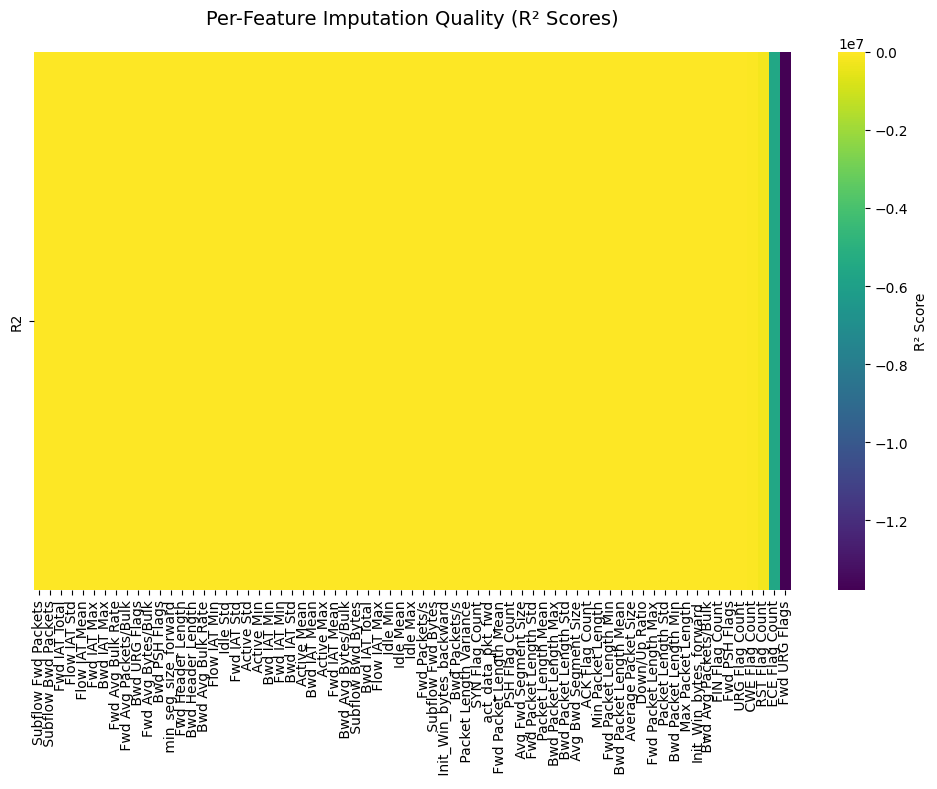

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create DataFrame from results
results_df = pd.DataFrame({
    "Feature": group_c,
    "MSE": mse,
    "R2": r2
})

# Sort features by R²
results_df = results_df.sort_values("R2", ascending=False).reset_index(drop=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    results_df[["R2"]].T,   # transpose: features as columns
    cmap="viridis",
    cbar_kws={"label": "R² Score"},
    annot=False,
    xticklabels=results_df["Feature"],
    yticklabels=["R2"]
)

plt.xticks(rotation=90)
plt.title("Per-Feature Imputation Quality (R² Scores)", fontsize=14, pad=20)
plt.tight_layout()

# Save with high resolution
plt.savefig("/content/drive/MyDrive/Final-Project/imputation/imputation_r2_heatmap.png", dpi=300)
plt.show()

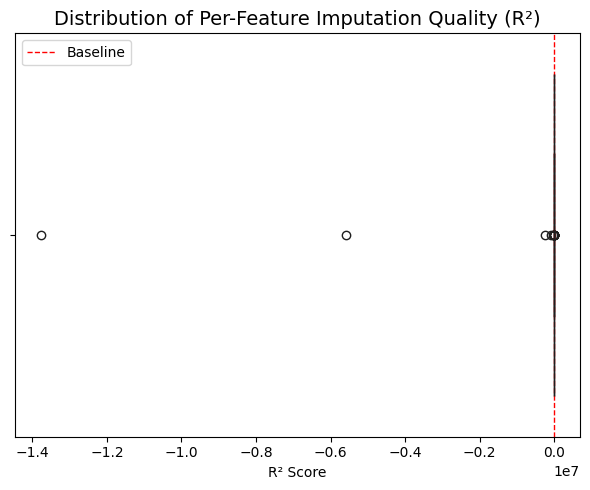

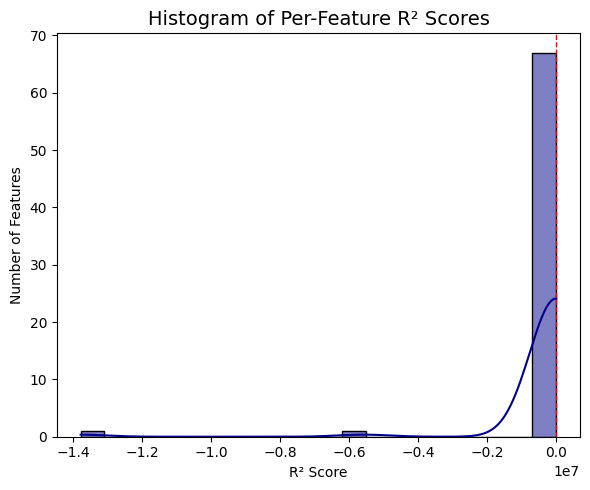

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

results_df = pd.DataFrame({
    "Feature": group_c,
    "MSE": mse,
    "R2": r2
})

# --- Boxplot of R² distribution ---
plt.figure(figsize=(6, 5))
sns.boxplot(x=results_df["R2"], color="darkgreen")
plt.title("Distribution of Per-Feature Imputation Quality (R²)", fontsize=14)
plt.xlabel("R² Score")
plt.axvline(0, color="red", linestyle="--", linewidth=1, label="Baseline")
plt.legend()
plt.tight_layout()
plt.savefig("imputation_r2_boxplot.png", dpi=300)
plt.show()

# --- Histogram of R² distribution ---
plt.figure(figsize=(6, 5))
sns.histplot(results_df["R2"], bins=20, kde=True, color="darkblue")
plt.title("Histogram of Per-Feature R² Scores", fontsize=14)
plt.xlabel("R² Score")
plt.ylabel("Number of Features")
plt.axvline(0, color="red", linestyle="--", linewidth=1)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Final-Project/imputation/imputation_r2_histogram.png", dpi=300)
plt.show()

The above processes Declare us which features has to be Normalized and which Saclling teqnice has to be used. I will give furter information later.

In [ ]:
# display features which have sum of less then 2 from chracteristic_feature function
def max_two_feature(features):
  '''
  This function is going to check if there is flags counts and
  features with maximum values less then or equal to value 2 take them as
  no normalization.
  '''
  feature_values = []
  for key, val in feature_characteristic(data.drop(' Label', axis=1).columns).items(): # taking just numerical type
    if max(val) <= 2 or 'Flag' in key:
      feature_values.append(key)

  return feature_values

In [ ]:
# Store features which has low values
low_val_feature = max_two_feature(data.drop(' Label',axis=1))
low_val_feature

['Fwd PSH Flags',
 ' Bwd PSH Flags',
 ' Fwd URG Flags',
 ' Bwd URG Flags',
 'FIN Flag Count',
 ' SYN Flag Count',
 ' RST Flag Count',
 ' PSH Flag Count',
 ' ACK Flag Count',
 ' URG Flag Count',
 ' CWE Flag Count',
 ' ECE Flag Count',
 'Fwd Avg Bytes/Bulk',
 ' Fwd Avg Packets/Bulk',
 ' Fwd Avg Bulk Rate']

I am going to catagories features based on Normalization:
1. Features with Outliers are going to be scale by RobustScaler.
2. Featres with less values (less then 2) are not going to be scale.


In [ ]:
# Create a function for identifying any features with Outliers
def outlier_feature(features):
  '''
  This function will return list of all features which has Outliers either minimum of maximum
  '''
  # storing features which has outliers (upper or lower)
  outliers = []


  for feature in features:
    Q1 = data[feature].quantile(0.25) # quantile function will return any feature value as given its percentage
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1

    # identify outliers
    threshold = 1.5
    lower_boundary = Q1 - threshold * IQR # finding the lowest value of range of values in a feature
    upper_boundary = Q3 + threshold * IQR # find highest value of range of values in a feature
    low_and_high_outlier = [lower_boundary, upper_boundary]

    # Minimum & Maximum value of a feature
    min_val = data[feature].min()
    max_val = data[feature].max()


    # Checking the outliers
    if min_val < low_and_high_outlier[0]: # check if there is a value less then minimum of outliers
      if feature not in outliers and feature not in low_val_feature: # checking for duplicate key in dictionary and make sure of not adding no scale feature
        outliers.append(feature)

    elif max_val > low_and_high_outlier[1]: # checking if there is a vlue higher then maximum outliers
      if feature not in outliers and feature not in low_val_feature: # check for duplicate key
        outliers.append(feature)

  return outliers

In [ ]:
outliers = outlier_feature(data.drop([' Destination Port',' Label'],axis=1).columns) # first column is Destination port which is important and does not need any scaling
outliers

[' Flow Duration',
 ' Total Fwd Packets',
 ' Total Backward Packets',
 'Total Length of Fwd Packets',
 ' Total Length of Bwd Packets',
 ' Fwd Packet Length Max',
 ' Fwd Packet Length Min',
 ' Fwd Packet Length Mean',
 ' Fwd Packet Length Std',
 'Bwd Packet Length Max',
 ' Bwd Packet Length Min',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 'Flow Bytes/s',
 ' Flow Packets/s',
 ' Flow IAT Mean',
 ' Flow IAT Std',
 ' Flow IAT Max',
 ' Flow IAT Min',
 'Fwd IAT Total',
 ' Fwd IAT Mean',
 ' Fwd IAT Std',
 ' Fwd IAT Max',
 ' Fwd IAT Min',
 'Bwd IAT Total',
 ' Bwd IAT Mean',
 ' Bwd IAT Std',
 ' Bwd IAT Max',
 ' Bwd IAT Min',
 ' Fwd Header Length',
 ' Bwd Header Length',
 'Fwd Packets/s',
 ' Bwd Packets/s',
 ' Min Packet Length',
 ' Max Packet Length',
 ' Packet Length Mean',
 ' Packet Length Std',
 ' Packet Length Variance',
 ' Down/Up Ratio',
 ' Average Packet Size',
 ' Avg Fwd Segment Size',
 ' Avg Bwd Segment Size',
 ' Bwd Avg Bytes/Bulk',
 ' Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk

In [ ]:
len(outliers), len(low_val_feature)

(61, 15)

In [ ]:
# Checking which features are remain that are not included in both categories
def remain_feature(outliers, low_val_feature):
  for feat in data.columns:
    if feat not in outliers and feat not in low_val_feature:
      print(feat)
  return

remain_feature(outliers, low_val_feature)

 Destination Port
 Label


Based on **Statistical Analyzation** I discovered that Features with very haigh and very low values need to be normalized. Normalization helps our model to learn better and not to be overfit. However, there are features which do not requires Normalization and if we do our model will misunderstod(bias).

### Normalization:
Features which has outliers are going to be Scale using RobustScaler.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
import joblib

def scale_features(data, outlier_columns, save_path="scaler_pipeline.joblib"):
    """
    Scales specified columns in the dataset using a RobustScaler inside a Pipeline
    and saves the pipeline for later use.

    Parameters:
    - data: pandas DataFrame
    - outlier_columns: list of column names to scale
    - save_path: file path to save the pipeline as joblib

    Returns:
    - Transformed DataFrame
    """
    # Create the pipeline
    pipeline = Pipeline([
        ('scaler', RobustScaler())
    ])

    # Fit and transform only the specified columns
    data[outlier_columns] = pipeline.fit_transform(data[outlier_columns])

    # Save the pipeline for later use
    joblib.dump(pipeline, save_path)

    return data

data = scale_features(data, outliers, '/content/drive/MyDrive/Final-Project/scaler_pipeline.joblib')

In [ ]:
data.duplicated().value_counts()

,count
False,3182720
True,307376


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
len(data)

3182720

In [ ]:
data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6.281866,2.000000,1.333333,0.830986,3.500490,0.529595,0.000000,0.166928,0.680016,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,BENIGN
1,443,6.529501,2.333333,0.666667,0.856338,5.177277,0.464174,0.000000,0.089864,0.582873,...,0.000000,295682.0,0.0,295682.0,295682.0,0.087827,0.0,0.086932,0.110589,BENIGN
2,53,0.177981,0.666667,0.000000,0.338028,0.043095,0.024922,1.371429,0.206897,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,BENIGN
3,135,-0.038980,-0.333333,-0.333333,-0.202817,-0.127326,-0.124611,0.000000,-0.695925,0.000000,...,1.666667,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,PortScan
4,54273,-0.039036,-0.333333,-0.333333,-0.202817,-0.133203,-0.124611,0.000000,-0.695925,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3491449,80,119.186272,1.000000,2.000000,0.845070,11.223310,0.996885,0.000000,0.703448,1.368058,...,0.000000,10972.0,0.0,10972.0,10972.0,1.686106,0.0,1.668930,2.123110,DoS Hulk
3491450,443,4.783171,1.000000,-0.333333,0.160563,-0.093046,0.015576,0.171429,-0.210658,0.160897,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,BENIGN
3491451,53,-0.008394,0.000000,0.000000,0.022535,0.037218,0.000000,1.142857,0.056426,0.000000,...,1.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,BENIGN
3491452,53,-0.009259,0.000000,0.000000,-0.033803,0.203722,-0.031153,0.857143,-0.131661,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,BENIGN


In [ ]:
# shape of features after normalization in plot
# plot_features(' Label')

Converting `Label`(Normal and Non-normal data) object type to `0(Normal)`, `1(Attack)`

In [ ]:
# lets convert Normal and Unnormal data into 0 and 1
def convert_label(dataset):
  conversion = {} #storing normal values as key of BENIGN and value of 0 and non-normal as their type and value of 1

  for value in dataset[' Label'].unique(): # goes through each unique value of Label feature
    if value == 'BENIGN':
      conversion[value] = 0
    else:
      conversion[value] = 1

  # setting new label as Nlabel
  data['Nlabel'] = data[' Label'].map(conversion)

  # removing the old Label feature
  data.drop(' Label',axis=1,inplace=True)

  return data # return new data

In [ ]:
# lets check our new dataset
convert_label(data)
data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Nlabel
0,443,6.281866,2.000000,1.333333,0.830986,3.500490,0.529595,0.000000,0.166928,0.680016,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0
1,443,6.529501,2.333333,0.666667,0.856338,5.177277,0.464174,0.000000,0.089864,0.582873,...,0.000000,295682.0,0.0,295682.0,295682.0,0.087827,0.0,0.086932,0.110589,0
2,53,0.177981,0.666667,0.000000,0.338028,0.043095,0.024922,1.371429,0.206897,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0
3,135,-0.038980,-0.333333,-0.333333,-0.202817,-0.127326,-0.124611,0.000000,-0.695925,0.000000,...,1.666667,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,1
4,54273,-0.039036,-0.333333,-0.333333,-0.202817,-0.133203,-0.124611,0.000000,-0.695925,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3491449,80,119.186272,1.000000,2.000000,0.845070,11.223310,0.996885,0.000000,0.703448,1.368058,...,0.000000,10972.0,0.0,10972.0,10972.0,1.686106,0.0,1.668930,2.123110,1
3491450,443,4.783171,1.000000,-0.333333,0.160563,-0.093046,0.015576,0.171429,-0.210658,0.160897,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0
3491451,53,-0.008394,0.000000,0.000000,0.022535,0.037218,0.000000,1.142857,0.056426,0.000000,...,1.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0
3491452,53,-0.009259,0.000000,0.000000,-0.033803,0.203722,-0.031153,0.857143,-0.131661,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0


In [ ]:
# check the type of features for the last time
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3182720 entries, 0 to 3491453
Data columns (total 78 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                float64
 2    Total Fwd Packets            float64
 3    Total Backward Packets       float64
 4   Total Length of Fwd Packets   float64
 5    Total Length of Bwd Packets  float64
 6    Fwd Packet Length Max        float64
 7    Fwd Packet Length Min        float64
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         float64
 11   Bwd Packet Length Min        float64
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max              

### Spliting dataset
Split data into x & y and train, valid and test.

In [ ]:
# importing train_test_split
from sklearn.model_selection import train_test_split

# split function
def split_data(dataset):
  dataset = dataset.sample(frac=1, random_state=1).reset_index(drop=True)
  # Split into x & y
  x = dataset.drop('Nlabel',axis=1)
  y = dataset['Nlabel']

  # spliting data into train and temp
  x_train, x_temp, y_train, y_temp = train_test_split(x,y, test_size=0.3, random_state=1)

  # split the temp into test and valid
  x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=1)

  return x_train, x_val, x_test, y_train, y_val, y_test

#### Lets transfer our Pandas DataFrame data into Tensorflow Tensor.
Tensorflow tensor is much faster during training and evaluation and gives us the usability of GPU or TPU.

In [ ]:
# convert Pandas DataFrame into Tensorflow Tensor

def dataframe_to_tensor():
  '''
  This function is going to convert Pandas DataFrame into TensorFlow Tensor
  and then Reshape them from 2D to 3D for model fitting.
  And at last change them to tensorflow dataset and shuffle them for better model operation.
  '''
  # set random seed
  tf.random.set_seed(1)

  # train validate and test the dataset first using scikit-learn then convert them into tensor
  x_train, x_val, x_test, y_train, y_val, y_test = split_data(data)

  # DataFrame to TensorFlow Tensor
  x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
  x_val = tf.convert_to_tensor(x_val, dtype=tf.float32)
  x_test = tf.convert_to_tensor(x_test, dtype=tf.float32)
  y_train = tf.convert_to_tensor(y_train, dtype=tf.int16)
  y_val = tf.convert_to_tensor(y_val, dtype=tf.int16)
  y_test = tf.convert_to_tensor(y_test, dtype=tf.int16)


  # reshape the tensor from 2D to 3D
  x_train = tf.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
  x_val = tf.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
  x_test = tf.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  # Convert to tf.data.Dataset
  train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
  val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
  test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

  # Shuffle and batch the datasets
  batch_size = 64
  train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
  val_dataset = val_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
  test_dataset = test_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

  return train_dataset, val_dataset, test_dataset, x_test, y_test

In [ ]:
# Call Dataframe into tensor function

train_dataset, val_dataset, test_dataset, x_test, y_test = dataframe_to_tensor()

### Training our CNN models
After this time I am going to Traina and evaluate my models.
There are many models and the first one is the best model I have tested on
unseen and seen dataset and got better result or accyracy in both datasets.

In [ ]:
import time
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

# Define the CNN model
def create_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv1D(8, 3, activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling1D(2),
        tf.keras.layers.Conv1D(16, 3, activation='relu'),
        tf.keras.layers.MaxPooling1D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification, so use sigmoid activation
    ])
    return model

# Create an instance of the model
model = create_model(input_shape=(77,1))  # Assuming x_train is 3D: (batch_size, sequence_length, num_features)

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Saving the model (full model)
model.save('/content/drive/MyDrive/Final-Project/Final-version/Final-binary.keras')

# Define the checkpoint callback to save weights to Google Drive
checkpoint_callback = ModelCheckpoint(
    '/content/drive/MyDrive/Final-Project/Draft-model/model_checkpoint.weights.h5',  # Update file name
    save_weights_only=True,
    save_best_only=True,
    monitor='val_loss',
    mode='min'
)

# Start time
start = time.time()

# Train the model with the checkpoint callback
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=[checkpoint_callback])

# Record the end time
end = time.time()

# Calculate the duration
duration = end - start

# Print the training duration
print(f'Training time: {duration:.2f} seconds')

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_dataset)
print('Test accuracy:', test_acc)


Epoch 1/10
34811/34811 ━━━━━━━━━━━━━━━━━━━━ 185s 5ms/step - accuracy: 0.9661 - loss: 623.4197 - val_accuracy: 0.9957 - val_loss: 0.0153
Epoch 2/10
34811/34811 ━━━━━━━━━━━━━━━━━━━━ 181s 5ms/step - accuracy: 0.9961 - loss: 0.0345 - val_accuracy: 0.9971 - val_loss: 0.0096
Epoch 3/10
34811/34811 ━━━━━━━━━━━━━━━━━━━━ 177s 5ms/step - accuracy: 0.9976 - loss: 0.4307 - val_accuracy: 0.9975 - val_loss: 0.0090
Epoch 4/10
34811/34811 ━━━━━━━━━━━━━━━━━━━━ 182s 5ms/step - accuracy: 0.9980 - loss: 0.0255 - val_accuracy: 0.9973 - val_loss: 0.0098
Epoch 5/10
34811/34811 ━━━━━━━━━━━━━━━━━━━━ 198s 5ms/step - accuracy: 0.9982 - loss: 0.0076 - val_accuracy: 0.9978 - val_loss: 0.0075
Epoch 6/10
34811/34811 ━━━━━━━━━━━━━━━━━━━━ 179s 5ms/step - accuracy: 0.9983 - loss: 0.0072 - val_accuracy: 0.9981 - val_loss: 0.0062
Epoch 7/10
34811/34811 ━━━━━━━━━━━━━━━━━━━━ 180s 5ms/step - accuracy: 0.9984 - loss: 0.0162 - val_accuracy: 0.9976 - val_loss: 0.0073
Epoch 8/10
34811/34811 ━━━━━━━━━━━━━━━━━━━━ 180s 5ms/step - 

# Best Model of Hyperparameter tunning

# Cross validation used K-Fold
the cross validation is used on train dataset and to make sure that every part of dataset is been trained and there is no time for leting model become bias.

In [ ]:
# import tensorflow as tf
from sklearn.model_selection import KFold
# import numpy as np
import time

# Function to create the Keras model
def create_model(input_shape):
    tf.random.set_seed(1)
    model = tf.keras.Sequential([
        tf.keras.layers.Conv1D(8, 3, activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling1D(2),
        tf.keras.layers.Conv1D(16, 3, activation='relu'),
        tf.keras.layers.MaxPooling1D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification, so use sigmoid activation
    ])
    return model

# Convert data to the correct shape for Conv1D
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Convert y_train and y_test to NumPy arrays
y_train_np = y_train.numpy()
y_test_np = y_test.numpy()

# Create KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Initialize arrays to store fold results
val_scores = []
train_times = []

# Training loop with cross-validation
fold = 1
for train_index, val_index in kf.split(x_train):
    print(f"Training fold {fold}...")
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train_np[train_index], y_train_np[val_index]

    # Create datasets for the current fold
    train_dataset_fold = tf.data.Dataset.from_tensor_slices((x_train_fold, y_train_fold)).batch(16).prefetch(tf.data.experimental.AUTOTUNE)
    val_dataset_fold = tf.data.Dataset.from_tensor_slices((x_val_fold, y_val_fold)).batch(16).prefetch(tf.data.experimental.AUTOTUNE)

    # Create an instance of the model
    model = create_model(input_shape=(x_train_fold.shape[1], x_train_fold.shape[2]))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Start time
    start = time.time()

    # Train the model
    history = model.fit(train_dataset_fold,
                        epochs=10,
                        validation_data=val_dataset_fold,
                        verbose=1)

    # Record the end time
    end = time.time()

    # Calculate the duration
    duration = end - start
    train_times.append(duration)

    # Print the training duration
    print(f'Training time for fold {fold}: {duration:.2f} seconds')

    # Evaluate the model on the validation dataset
    val_loss, val_acc = model.evaluate(val_dataset_fold, verbose=1)
    val_scores.append(val_acc)
    print(f'Validation accuracy for fold {fold}: {val_acc}')

    # Save the model for the current fold
    model.save(f'/content/drive/MyDrive/Final-Project/Saved-models/K-fold/model_fold_{fold}.h5')
    print(f'Model for fold {fold} saved.')

    fold += 1

# Print cross-validation results
print('Cross-validation results:')
for i, val_acc in enumerate(val_scores, 1):
    print(f'Fold {i} validation accuracy: {val_acc}')

print(f'Average validation accuracy: {np.mean(val_scores)}')
print(f'Training times: {train_times}')
print(f'Average training time: {np.mean(train_times)}')

# Retrain the final model on the entire training set
print('Retraining the final model on the entire training dataset...')
final_model = create_model(input_shape=(x_train.shape[1], x_train.shape[2]))
final_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train_np)).batch(16).prefetch(tf.data.experimental.AUTOTUNE)
final_model.fit(train_dataset, epochs=10, verbose=1)

# Save the final model
final_model.save('/content/drive/MyDrive/Final-Project/Saved-models/K-fold/final_model.h5')
print('Final model saved.')

# Evaluate the final model on the test dataset
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test_np)).batch(16).prefetch(tf.data.experimental.AUTOTUNE)
test_loss, test_acc = final_model.evaluate(test_dataset, verbose=1)
print('Test accuracy:', test_acc)


Training fold 1...
Epoch 1/10
122154/122154 [==============================] - 442s 4ms/step - loss: 26.1706 - accuracy: 0.9855 - val_loss: 0.3926 - val_accuracy: 0.9961
Epoch 2/10
122154/122154 [==============================] - 431s 4ms/step - loss: 0.9067 - accuracy: 0.9964 - val_loss: 24.5658 - val_accuracy: 0.9967
Epoch 3/10
122154/122154 [==============================] - 445s 4ms/step - loss: 6.9888 - accuracy: 0.9974 - val_loss: 0.0088 - val_accuracy: 0.9980
Epoch 4/10
122154/122154 [==============================] - 453s 4ms/step - loss: 17.9470 - accuracy: 0.9977 - val_loss: 4.0870 - val_accuracy: 0.9979
Epoch 5/10
122154/122154 [==============================] - 453s 4ms/step - loss: 0.9003 - accuracy: 0.9978 - val_loss: 4.5614 - val_accuracy: 0.9981
Epoch 6/10
122154/122154 [==============================] - 448s 4ms/step - loss: 59.5488 - accuracy: 0.9967 - val_loss: 0.0148 - val_accuracy: 0.9963
Epoch 7/10
122154/122154 [==============================] - 435s 4ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/10
122154/122154 [==============================] - 517s 4ms/step - loss: 10.0363 - accuracy: 0.9856 - val_loss: 0.0224 - val_accuracy: 0.9924
Epoch 2/10
122154/122154 [==============================] - 468s 4ms/step - loss: 1.5833 - accuracy: 0.9946 - val_loss: 0.0118 - val_accuracy: 0.9959
Epoch 3/10
122154/122154 [==============================] - 471s 4ms/step - loss: 0.2494 - accuracy: 0.9962 - val_loss: 0.0095 - val_accuracy: 0.9973
Epoch 4/10
122154/122154 [==============================] - 487s 4ms/step - loss: 27.0738 - accuracy: 0.9969 - val_loss: 436.7246 - val_accuracy: 0.9966
Epoch 5/10
122154/122154 [==============================] - 468s 4ms/step - loss: 5.5330 - accuracy: 0.9973 - val_loss: 0.0079 - val_accuracy: 0.9978
Epoch 6/10
122154/122154 [==============================] - 503s 4ms/step - loss: 108.1728 - accuracy: 0.9974 - val_loss: 0.0070 - val_accuracy: 0.9981
Epoch 7/10
122154/122154 [==============================] - 497s 4ms/step - loss: 0.0680 - acc

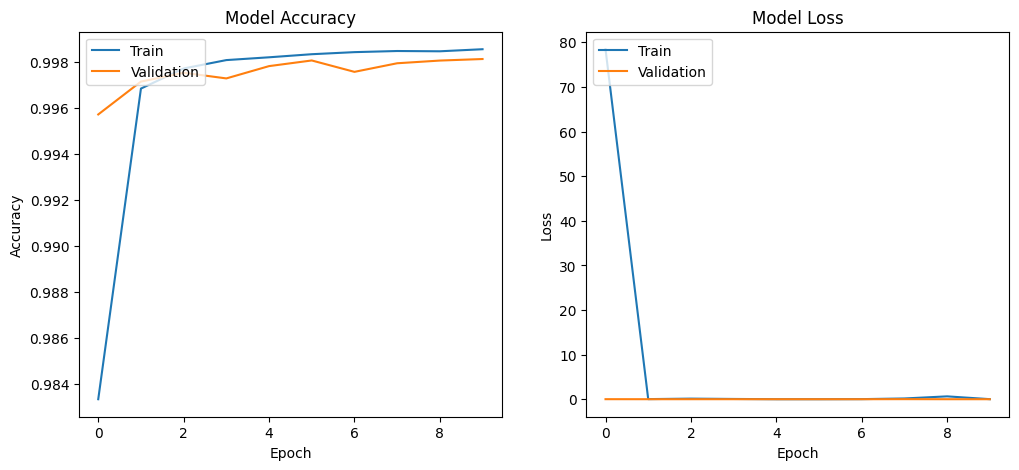

In [ ]:
def train_valid_plot(history):
  # Plotting the training history
  plt.figure(figsize=(12, 5))

  # Plot training & validation accuracy values
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train', 'Validation'], loc='upper left')

  # Plot training & validation loss values
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.savefig("/content/drive/MyDrive/Final-Project/Final-version/binary-epochs.png",dpi=300)
  plt.show()
train_valid_plot(history)

7460/7460 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step


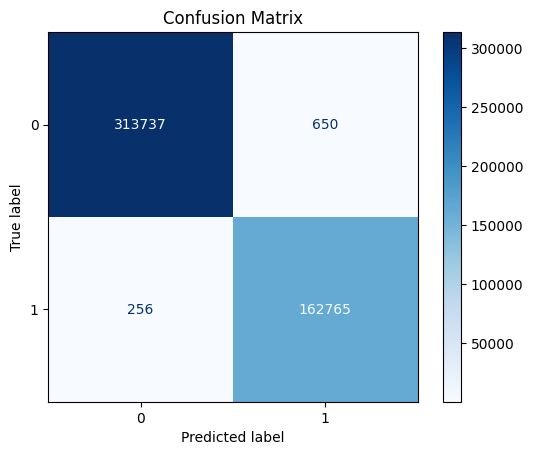

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314387
           1       1.00      1.00      1.00    163021

    accuracy                           1.00    477408
   macro avg       1.00      1.00      1.00    477408
weighted avg       1.00      1.00      1.00    477408



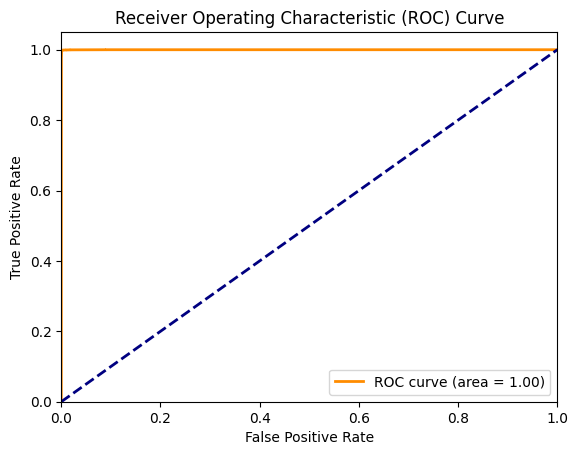

In [ ]:
# importing Evaluation metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc

# Evaluation function
def eval_plot(model):
  # Predict on the test dataset
  y_test_pred_proba = model.predict(test_dataset).flatten()
  y_test_pred = (y_test_pred_proba > 0.5).astype(int)

  # Confusion Matrix
  cm = confusion_matrix(y_test, y_test_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
  disp.plot(cmap=plt.cm.Blues)
  plt.title('Confusion Matrix')
  plt.savefig("/content/drive/MyDrive/Final-Project/Final-version/binary-confusion.png",dpi=300)
  plt.show()

  # Classification Report
  print("Classification Report:")
  print(classification_report(y_test, y_test_pred))

  # ROC Curve and AUC
  fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
  roc_auc = auc(fpr, tpr)

  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc="lower right")
  plt.savefig("/content/drive/MyDrive/Final-Project/Final-version/binary-ROC.png",dpi=300)
  plt.show()

  return
eval_plot(model)

In [ ]:
# import pickle

# # Save the history object
# with open('/content/drive/MyDrive/Final-Project/Saved-models/model_history.pkl', 'wb') as file:
#     pickle.dump(history.history, file)

In [ ]:
# Save the model
# model.save('/content/drive/MyDrive/Final-Project/Saved-models/Final-binary-first-model.h5')

In [ ]:
# # import the model
# model = tf.keras.models.load_model('/content/drive/MyDrive/Final-Project/Saved-models/Final-binary-first-model.h5')

# # check test dataset
# test_loss, test_acc = model.evaluate(test_dataset)
# print('Test accuracy of loaded model:', test_acc)

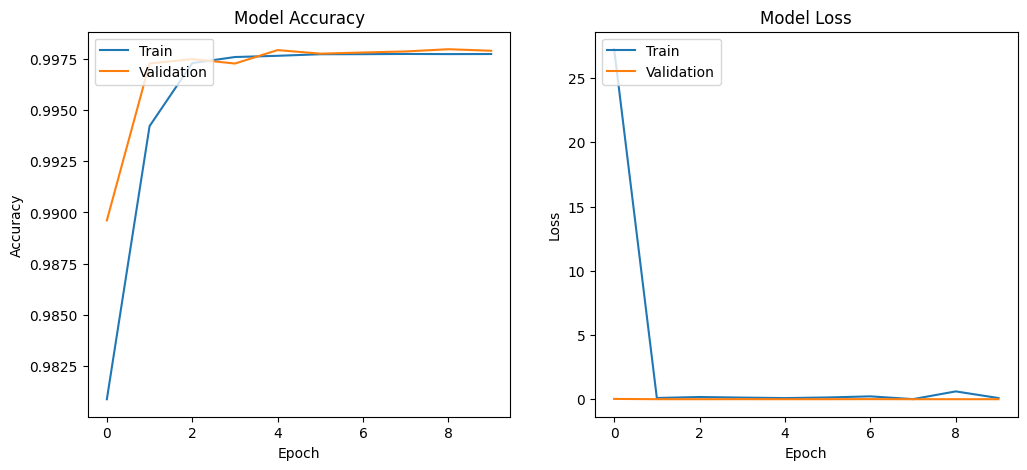

In [ ]:
def train_valid_plot(history):
  # Plotting the training history
  plt.figure(figsize=(12, 5))

  # Plot training & validation accuracy values
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train', 'Validation'], loc='upper left')

  # Plot training & validation loss values
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train', 'Validation'], loc='upper left')

  plt.show()

26526/26526 [==============================] - 49s 2ms/step


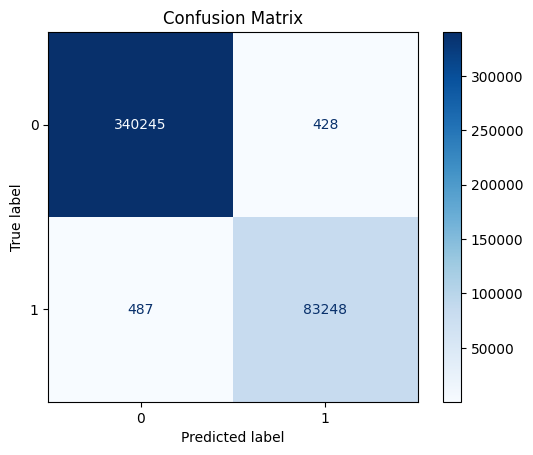

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    340673
           1       0.99      0.99      0.99     83735

    accuracy                           1.00    424408
   macro avg       1.00      1.00      1.00    424408
weighted avg       1.00      1.00      1.00    424408



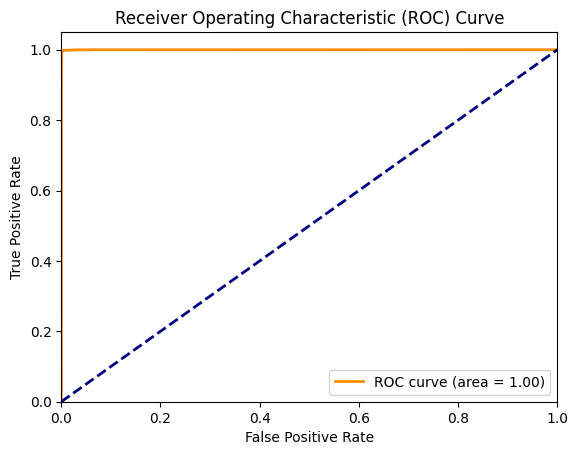

In [ ]:
# importing Evaluation metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc

# Evaluation function
def eval_plot(model):
  # Predict on the test dataset
  y_test_pred_proba = model.predict(test_dataset).flatten()
  y_test_pred = (y_test_pred_proba > 0.5).astype(int)

  # Confusion Matrix
  cm = confusion_matrix(y_test, y_test_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
  disp.plot(cmap=plt.cm.Blues)
  plt.title('Confusion Matrix')
  plt.show()

  # Classification Report
  print("Classification Report:")
  print(classification_report(y_test, y_test_pred))

  # ROC Curve and AUC
  fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
  roc_auc = auc(fpr, tpr)

  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc="lower right")
  plt.show()

  return

In [ ]:
# Save the model
# model.save('/content/drive/MyDrive/Final-Project/Draft-model/Regularization/regular-binary-model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### lets check the cross validation of our model

In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score


def create_model():
    model = tf.keras.models.load_model('/content/drive/MyDrive/Final-Project/Saved-models/Final-binary-first-model.h5', compile=False)
    # Compile the model with a new optimizer instance
    model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the Keras model in KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=16, verbose=0)

# Perform cross-validation
train_cross_val = cross_val_score(model, x_train.numpy(), y_train.numpy(), cv=5, scoring='accuracy')

print("Cross-validation scores:", train_cross_val)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequ

Cross-validation scores: [0.99779104 0.99730886 0.99747295 0.99785415 0.99753606]


# Testing

In [ ]:
# Evaluation on test & valid datasets
def val_test_eval():
  '''
  This function is going to evaluate the loss and accuracy of test and & valid datasets.
  '''

  # Importing the trained model
  model = tf.keras.models.load_model('/content/drive/MyDrive/Final-Project/Saved-models/Final-binary-first-model.h5', compile=False)
  # Compile the model
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy'])

  # Reshape validation and test data to 3D if necessary
  x_val_reshaped = np.reshape(x_val.numpy(), (x_val.shape[0], x_val.shape[1], 1))
  x_test_reshaped = np.reshape(x_test.numpy(), (x_test.shape[0], x_test.shape[1], 1))

  # Evaluate the model on validation set
  val_loss, val_accuracy = model.evaluate(x_val_reshaped, y_val.numpy(), verbose=2)
  print(f'Validation accuracy: {val_accuracy}')
  print(f'Validation loss: {val_loss}')

  # Evaluate the model on test set
  test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test.numpy(), verbose=2)
  print(f'Test accuracy: {test_accuracy}')
  print(f'Test loss: {test_loss}')

  return model, x_test_reshaped


In [ ]:
# predicting on test dataset
def test_pred():

  model, x_test_reshaped = val_test_eval()

  y_pred = model.predict(x_test_reshaped)
  return y_pred


y_pred = test_pred()

13263/13263 - 27s - loss: 0.0087 - accuracy: 0.9977 - 27s/epoch - 2ms/step
Validation accuracy: 0.9977427124977112
Validation loss: 0.008717725053429604
13263/13263 - 27s - loss: 0.0094 - accuracy: 0.9976 - 27s/epoch - 2ms/step
Test accuracy: 0.9975801706314087
Test loss: 0.009354280307888985
13263/13263 [==============================] - 33s 2ms/step
